# OpenCV Benchmarking analysis

### Create dataset from combined benchmarks

In [66]:
from os import listdir
from os.path import isfile, join

benchmark_result_dir = './benchmark-results/'
csv_files = [benchmark_result_dir + f for f in listdir(benchmark_result_dir) if isfile(join(benchmark_result_dir, f))]

In [67]:
import pandas as pd

df_list = [ pd.read_csv(f) for f in csv_files ]
df = pd.concat(df_list)

In [68]:
df.columns = ['build', 'time']

df

,build,time
0,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7325556
1,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6889897
2,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7152223
3,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7113928
4,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6844989
...,...,...
1395,opencv-4.7.0-aocc-build-ipp-eigen-openmp,7122210
1396,opencv-4.7.0-aocc-build-ipp-eigen-openmp,7006331
1397,opencv-4.7.0-aocc-build-ipp-eigen-openmp,7000310
1398,opencv-4.7.0-aocc-build-ipp-eigen-openmp,6974605


### Group by build and aggregate with mean average, median average, standard deviation, min/max and percentiles

In [69]:
result = df.groupby('build', sort=False)['time'].aggregate(['describe', 'median'])
result.columns = result.columns.get_level_values(1)
result = result.rename(columns = {'time':'median'})
result = result.sort_values('median')

result

,count,mean,std,min,25%,50%,75%,max,median
build,,,,,,,,,
opencv-4.7.0-aocc-build-simplest,100.0,6855419.63,184745.104978,6610901.0,6752442.50,6819535.5,6899118.75,7527438.0,6819535.5
opencv-4.7.0-aocc-build-tbb-eigen-openmp,100.0,6836018.69,89118.348891,6650593.0,6775982.50,6840096.5,6886917.75,7054231.0,6840096.5
opencv-4.7.0-build-simplest,100.0,6843038.85,105631.285680,6675846.0,6774445.00,6847463.0,6897104.50,7251981.0,6847463.0
opencv-4.7.0-build-tbb-eigen-openmp,100.0,6847719.29,93052.655590,6635080.0,6792824.75,6848682.0,6911418.50,7154453.0,6848682.0
opencv-4.7.0-build-ipp-eigen-openmp,100.0,6932026.68,109286.100753,6730034.0,6835085.25,6910445.0,6997635.75,7173161.0,6910445.0
opencv-4.7.0-build-ipp-tbb-openmp,100.0,6940102.69,121419.426264,6759975.0,6833429.75,6934303.5,6985708.75,7208841.0,6934303.5
opencv-4.7.0-aocc-build-ipp-tbb-openmp,100.0,6953425.35,123044.787844,6741076.0,6860973.50,6936310.0,7057456.00,7215185.0,6936310.0
opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eigen-openmp-gcc,100.0,6950167.63,103809.054839,6733899.0,6902013.00,6936991.0,6988557.50,7206372.0,6936991.0
opencv-4.7.0-build-ipp-tbb-eigen,100.0,6965893.64,126372.423317,6763432.0,6886191.00,6939623.5,7028654.50,7419514.0,6939623.5


### Results

In [70]:
#result = result.head(10)

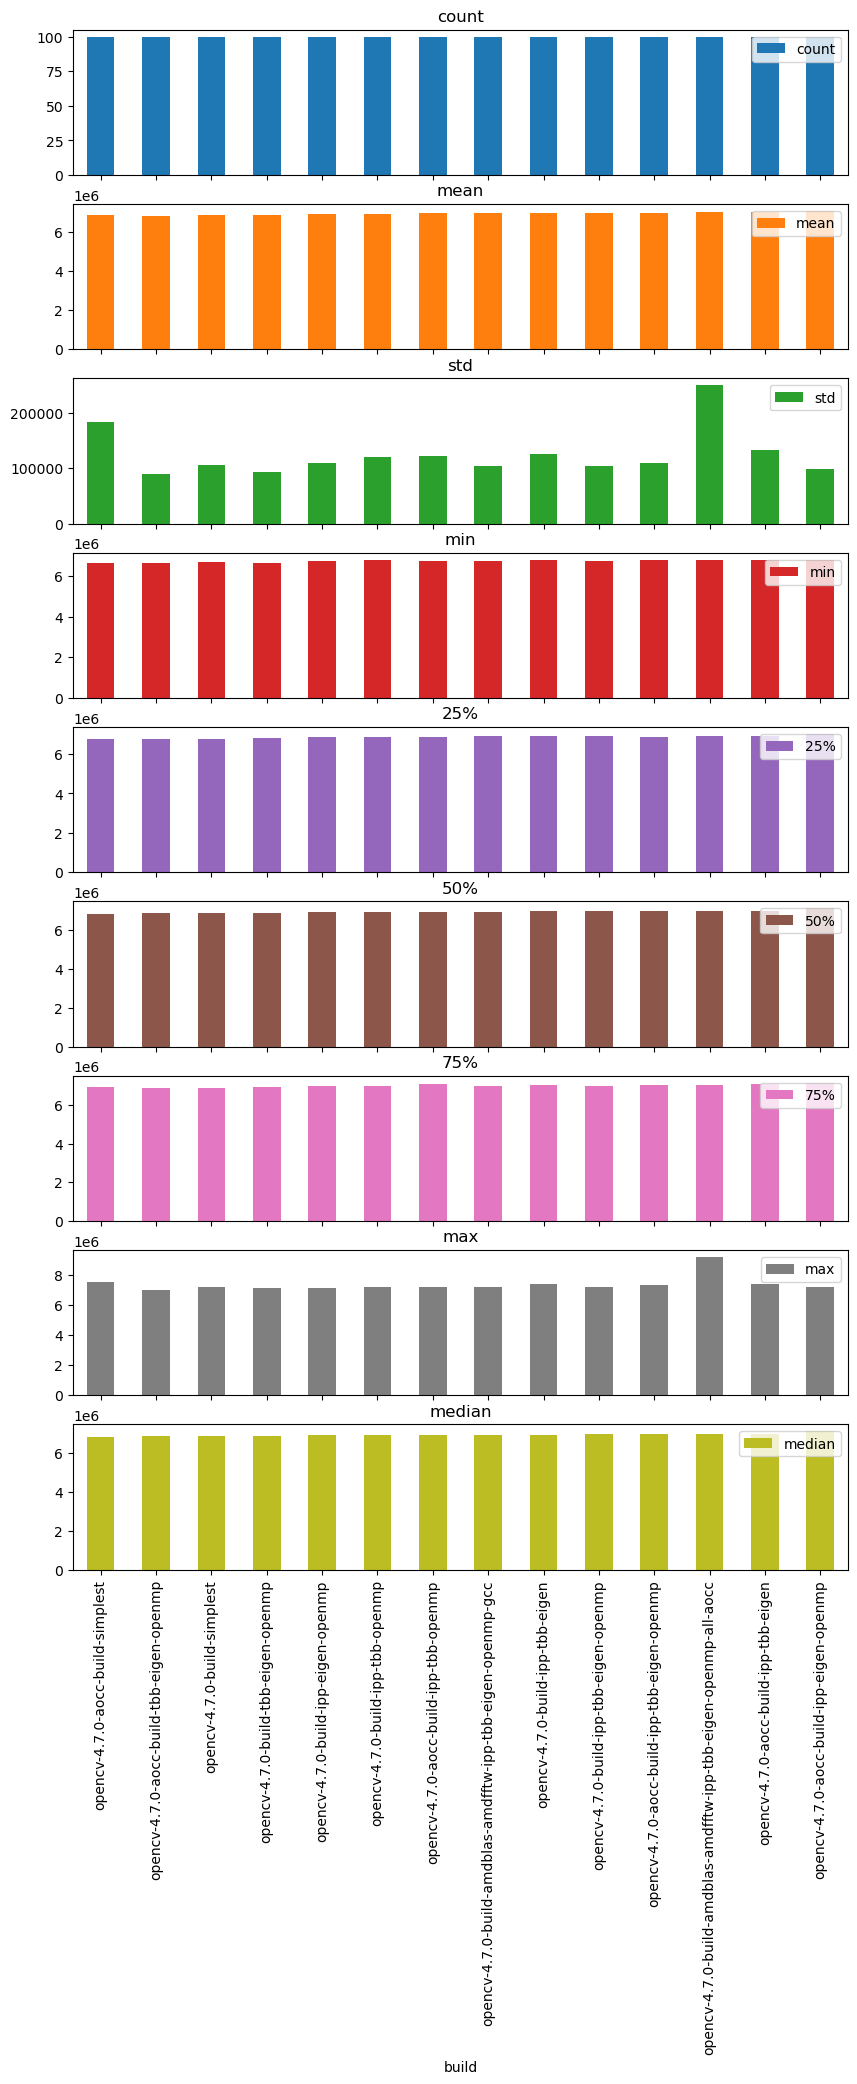

In [71]:
plt = result.plot.bar(subplots=True, figsize=(10,20))

I normalise the medians by subtracting the smallest one from all of them, to make it more obvious how big the difference is between them visually.

In [72]:
min_median = result['median'].min()
min_mean = result['mean'].min()
normalised = pd.DataFrame(result['median'].apply(lambda m: m - min_median))
normalised['mean'] = pd.DataFrame(result['mean'].apply(lambda m: m - min_mean))

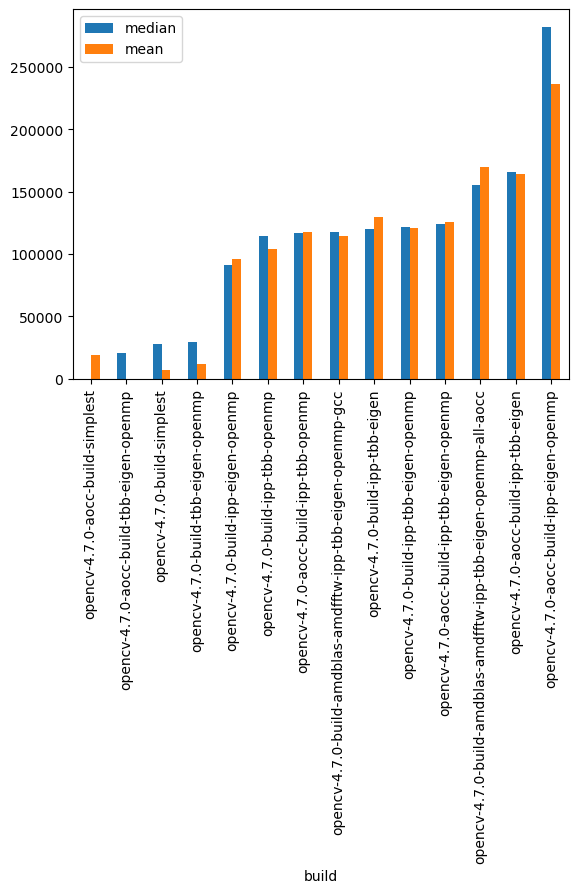

In [73]:
plt = normalised.plot.bar()

## Clean up data with interquartile method

In [74]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

In [75]:
df_cleaned = df[~df.groupby('build', sort=False, group_keys=False)['time'].apply(is_outlier)]

In [76]:
result_cleaned = df_cleaned.groupby('build', sort=False)['time'].aggregate(['describe', 'median'])
result_cleaned.columns = result_cleaned.columns.get_level_values(1)
result_cleaned = result_cleaned.rename(columns = {'time':'median'})
result_cleaned = result_cleaned.sort_values('median')

result_cleaned

,count,mean,std,min,25%,50%,75%,max,median
build,,,,,,,,,
opencv-4.7.0-aocc-build-simplest,98.0,6.841756e+06,159384.460296,6610901.0,6751861.50,6812571.0,6892366.75,7397416.0,6812571.0
opencv-4.7.0-aocc-build-tbb-eigen-openmp,100.0,6.836019e+06,89118.348891,6650593.0,6775982.50,6840096.5,6886917.75,7054231.0,6840096.5
opencv-4.7.0-build-simplest,98.0,6.835136e+06,90681.542684,6675846.0,6772841.00,6846003.0,6896304.50,7020496.0,6846003.0
opencv-4.7.0-build-tbb-eigen-openmp,99.0,6.844621e+06,88189.553872,6635080.0,6792503.50,6848654.0,6905294.50,7024677.0,6848654.0
opencv-4.7.0-build-ipp-eigen-openmp,100.0,6.932027e+06,109286.100753,6730034.0,6835085.25,6910445.0,6997635.75,7173161.0,6910445.0
opencv-4.7.0-build-ipp-tbb-openmp,100.0,6.940103e+06,121419.426264,6759975.0,6833429.75,6934303.5,6985708.75,7208841.0,6934303.5
opencv-4.7.0-aocc-build-ipp-tbb-openmp,100.0,6.953425e+06,123044.787844,6741076.0,6860973.50,6936310.0,7057456.00,7215185.0,6936310.0
opencv-4.7.0-build-ipp-tbb-eigen,99.0,6.961312e+06,118372.424129,6763432.0,6885607.00,6936367.0,7020859.00,7269909.0,6936367.0
opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eigen-openmp-gcc,100.0,6.950168e+06,103809.054839,6733899.0,6902013.00,6936991.0,6988557.50,7206372.0,6936991.0


### Results

In [77]:
# result = result.head(10)

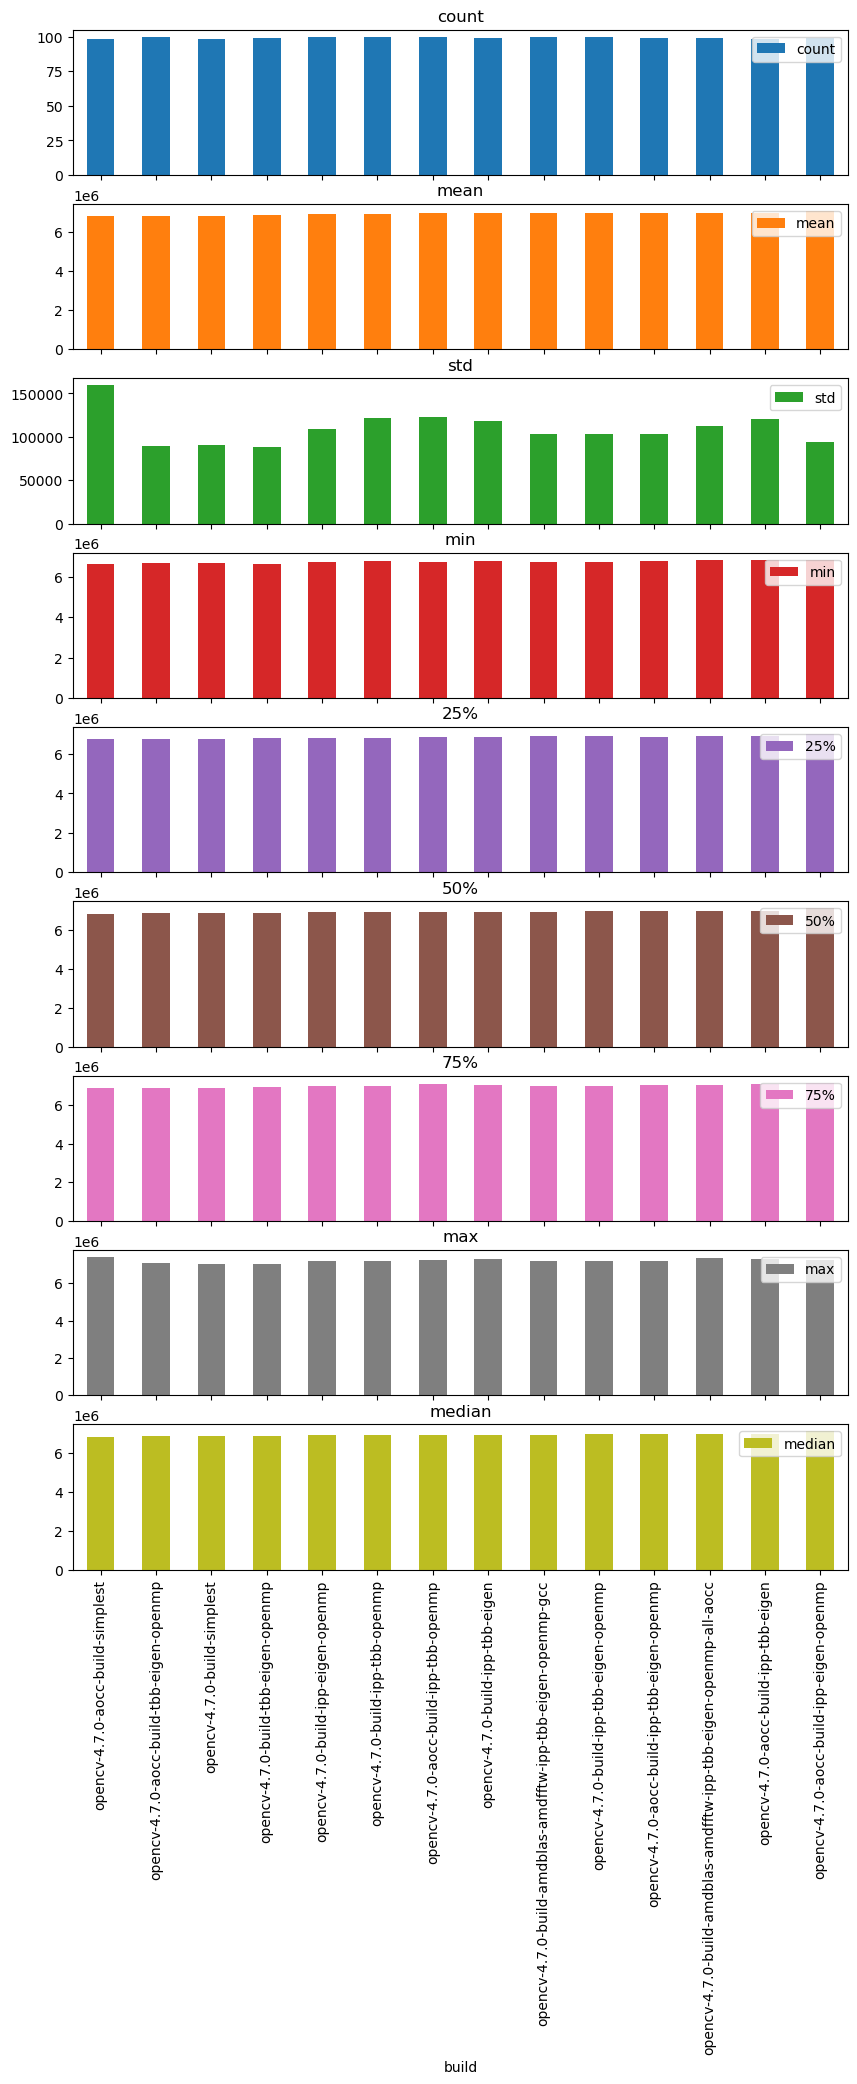

In [78]:
plt = result_cleaned.plot.bar(subplots=True, figsize=(10,20))

In [79]:
min_median = result_cleaned['median'].min()
min_mean = result_cleaned['mean'].min()
normalised = pd.DataFrame(result_cleaned['median'].apply(lambda m: m - min_median))
normalised['mean'] = pd.DataFrame(result_cleaned['mean'].apply(lambda m: m - min_mean))

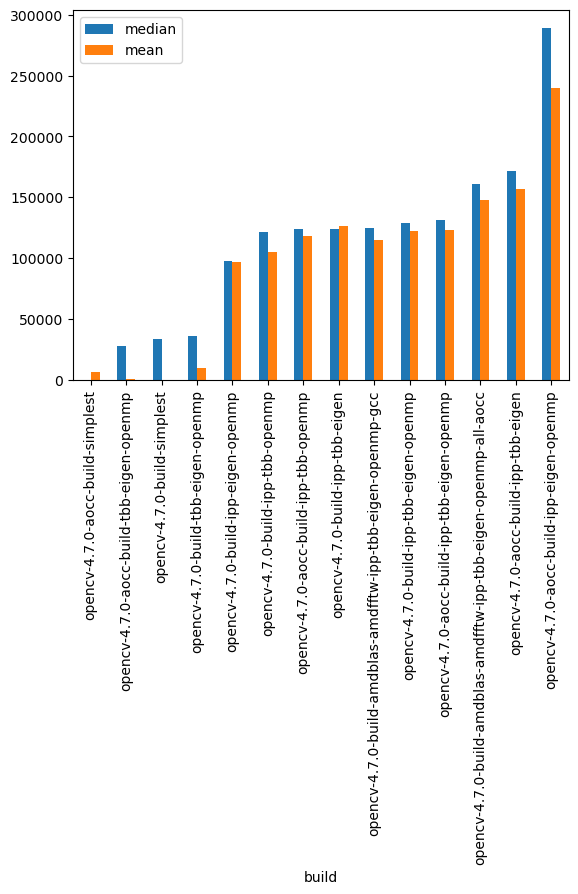

In [80]:
plt = normalised.plot.bar()